In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
male_images = '/Users/sankalpdeshmukh2820/Desktop/ML/Male Female Classifier/archive (2)/Training/male'
female_images = '/Users/sankalpdeshmukh2820/Desktop/ML/Male Female Classifier/archive (2)/Training/female'

In [4]:
males = os.listdir(male_images)
females = os.listdir(female_images)

In [5]:
print(len(males))
print(len(females))

23766
23243


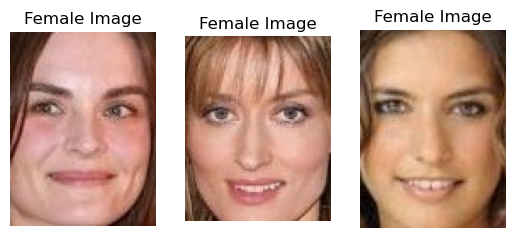

In [14]:
for i in range(3):  # Display the first 3 cat images
    female_im = Image.open(os.path.join(female_images, females[i+3]))
    plt.subplot(1, 3, i +1)
    plt.imshow(female_im)
    plt.axis('off')
    plt.title('Female Image')

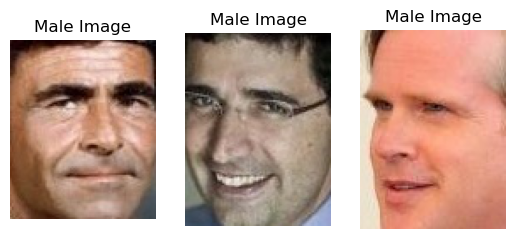

In [16]:
for i in range(3):  # Display the first 3 cat images
    male_im = Image.open(os.path.join(male_images, males[i+1]))
    plt.subplot(1, 3, i +1)
    plt.imshow(male_im)
    plt.axis('off')
    plt.title('Male Image')

In [17]:
import cv2

In [25]:
target_size = (64,64)
output_folder = '/Users/sankalpdeshmukh2820/Desktop/ML/Male Female Classifier/ResizedImages'
os.makedirs(output_folder,exist_ok = True)

# Function to resize the images and save them
def resize_save_image(input_path,output_path,target_size):
    image = cv2.imread(input_path)
    if image is not None:
        resized_image = cv2.resize(image,target_size)
        cv2.imwrite(output_path,resized_image)

for male in os.listdir(male_images):
    male_image_path = os.path.join(male_images,male)
    male_output_path = os.path.join(output_folder, 'male_' + male)
    resize_save_image(male_image_path,male_output_path,target_size)
                      
for female in os.listdir(female_images):
    female_image_path = os.path.join(female_images,female)
    female_output_path = os.path.join(output_folder,'female_'+female)
    resize_save_image(female_image_path,female_output_path,target_size)


In [28]:
resized_folder = '/Users/sankalpdeshmukh2820/Desktop/ML/Male Female Classifier/ResizedImages'
data = []
labels = []

for images in os.listdir(resized_folder):
    image_path = os.path.join(resized_folder,images)
    
    image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
    
    if image is not None:
        flattened_image = image.reshape(-1) 
        data.append(flattened_image)
        
        if 'male' in images:
            label = 1
        if 'female' in images:
            label = 0
        labels.append(label)
        
data = np.array(data)
labels = np.array(labels)

In [49]:
data = pd.DataFrame(data)
labels = pd.DataFrame(labels)
data.shape

(47009, 4096)

In [50]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,24,24,23,19,15,16,24,30,36,41,...,168,182,191,190,179,127,82,75,82,81
1,221,212,208,202,198,197,195,202,200,200,...,183,170,155,150,168,171,150,133,126,116
2,14,13,10,7,13,18,13,12,10,29,...,108,118,132,138,146,138,133,128,121,118
3,148,147,137,112,79,80,63,72,66,56,...,38,35,30,16,17,25,47,70,63,49
4,7,12,16,7,37,59,69,87,97,102,...,130,109,83,71,52,128,158,148,87,20


In [51]:
labels.head()

,0
0,1
1,0
2,1
3,0
4,1


In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data,labels,test_size = 0.2,random_state = 42)

In [54]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 100)

In [56]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [57]:
print(X_train_trf.shape)
print(X_test_trf.shape)

(37607, 100)
(9402, 100)


In [58]:
import tensorflow as tf
from tensorflow.keras import layers,models

2023-10-06 00:10:12.942813: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [170]:
classifier = models.Sequential([
    layers.Dense(100,activation = 'relu'),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(32,activation = 'relu'),
    layers.Dense(1,activation = 'sigmoid')
])

In [171]:
classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [172]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.01,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [173]:
model_history = classifier.fit(X_train_trf,Y_train,validation_split = 0.2, batch_size = 500 ,epochs = 100, callbacks = early_stopping)

Epoch 1/100
61/61 [==============================] - 2s 11ms/step - loss: 0.5727 - accuracy: 0.7455 - val_loss: 0.3733 - val_accuracy: 0.8463
Epoch 2/100
61/61 [==============================] - 0s 7ms/step - loss: 0.3337 - accuracy: 0.8624 - val_loss: 0.3139 - val_accuracy: 0.8766
Epoch 3/100
61/61 [==============================] - 0s 7ms/step - loss: 0.2811 - accuracy: 0.8887 - val_loss: 0.2849 - val_accuracy: 0.8889
Epoch 4/100
61/61 [==============================] - 0s 6ms/step - loss: 0.2496 - accuracy: 0.9019 - val_loss: 0.2691 - val_accuracy: 0.8947
Epoch 5/100
61/61 [==============================] - 0s 6ms/step - loss: 0.2231 - accuracy: 0.9146 - val_loss: 0.2545 - val_accuracy: 0.9018
Epoch 6/100
61/61 [==============================] - 0s 6ms/step - loss: 0.2025 - accuracy: 0.9224 - val_loss: 0.2527 - val_accuracy: 0.9049
Epoch 7/100
61/61 [==============================] - 0s 7ms/step - loss: 0.1851 - accuracy: 0.9295 - val_loss: 0.2462 - val_accuracy: 0.9065
Epoch 8/100


In [174]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

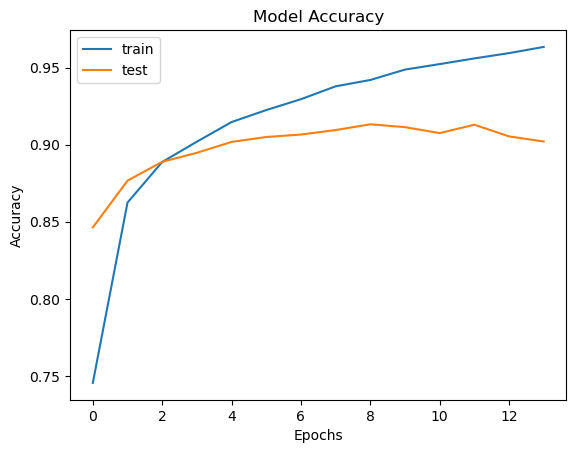

In [175]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

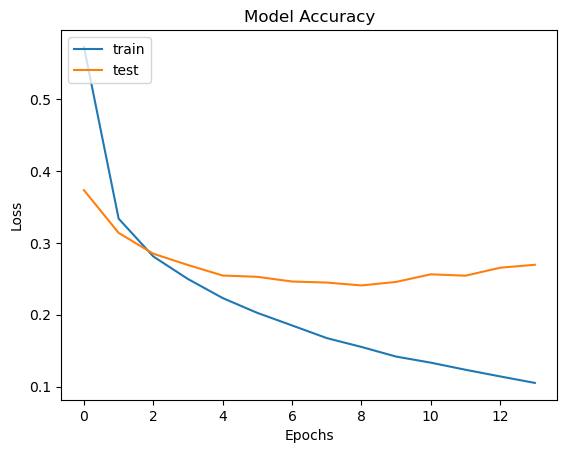

In [176]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','test'],loc = 'upper left')
plt.show()
     

In [177]:
Y_pred = classifier.predict(X_test_trf)
Y_pred = (Y_pred>=0.5)

294/294 [==============================] - 1s 3ms/step


In [178]:
test_loss, test_accuracy = classifier.evaluate(X_test_trf, Y_test)
print(f'Test accuracy: {test_accuracy}')

294/294 [==============================] - 1s 3ms/step - loss: 0.2560 - accuracy: 0.9116
Test accuracy: 0.9116145372390747


In [179]:
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_pred,Y_test)
score

0.9116145500957243